In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
np.random.seed(13)

print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)
print('Numpy version : ', np.__version__)

TensorFlow version :  1.8.0
Keras version :  2.2.4
Numpy version :  1.16.3


Using TensorFlow backend.


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
import random
samples = random.choices(population=range(0,60000), k=16)
samples

[21426,
 4361,
 42562,
 1000,
 15825,
 35458,
 13967,
 31214,
 57024,
 47532,
 12163,
 37675,
 46016,
 39953,
 57435,
 53750]

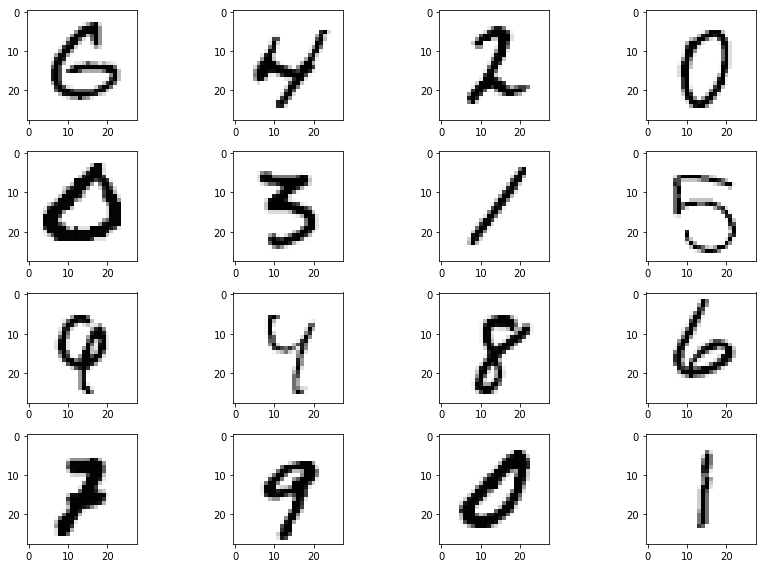

In [7]:
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_train[n].reshape(28, 28), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [8]:
# one hot encode outputs
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


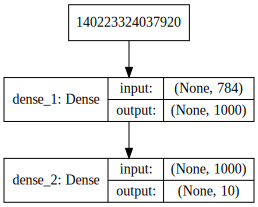

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test), 
                 epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2672 - acc: 0.9240 - val_loss: 0.1324 - val_acc: 0.9609
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1056 - acc: 0.9689 - val_loss: 0.0925 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0678 - acc: 0.9800 - val_loss: 0.0755 - val_acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0485 - acc: 0.9858 - val_loss: 0.0695 - val_acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0335 - acc: 0.9907 - val_loss: 0.0630 - val_acc: 0.9809
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0238 - acc: 0.9939 - val_loss: 0.0621 - val_acc: 0.9799
Epoch 7/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0174 - acc: 0.9957 - val_loss: 0.0588 - val

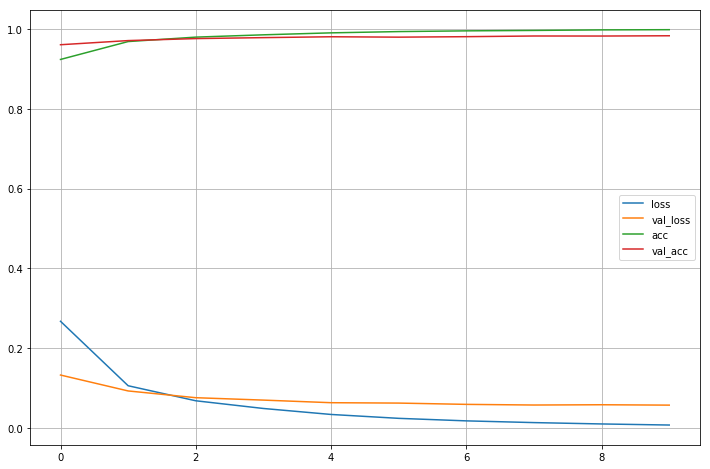

In [13]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05692668559230951
Test accuracy: 0.9834


In [15]:
X_train.shape[1]

784

In [16]:
X_test[0].shape

(784,)

In [17]:
X_test[0].reshape(784,1).shape

(784, 1)

In [18]:
model.predict_classes(X_test[0].reshape(1, 784))

array([7])

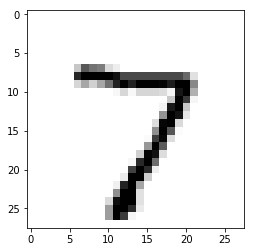

The Answer is  [7]


In [19]:
n = 0
plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(X_test[n].reshape(1,784)))

In [20]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
test_labels = np.argmax(y_test, axis=1)
test_labels

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
        
len(wrong_result)

166

In [23]:
import random
samples = random.choices(population=wrong_result, k=16)
samples

[9729,
 247,
 1156,
 1178,
 1878,
 1681,
 4248,
 4065,
 2915,
 5937,
 447,
 6597,
 445,
 1299,
 3718,
 9679]

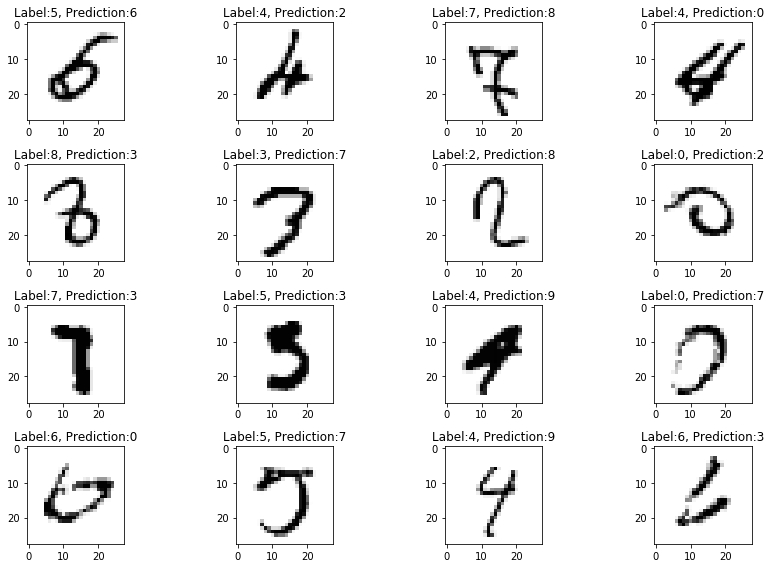

In [24]:
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()